In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

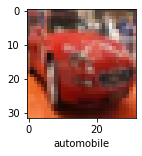

In [10]:
plot_sample(x_train,y_train,5)

In [22]:
nn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size = (3,3), activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),    
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation ='relu'),
    layers.Dense(10,activation= 'softmax')
    
])

In [23]:
nn.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [24]:
nn.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4036 - accuracy: 0.4925
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0426 - accuracy: 0.6337
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8939 - accuracy: 0.6866
Epoch 4/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7803 - accuracy: 0.7261
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6926 - accuracy: 0.7557


In [25]:
nn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.8850 - accuracy: 0.6947


[0.8850404024124146, 0.6947000026702881]